In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('ev_sales.csv') 
df.head()

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"


In [121]:
df.dropna(inplace=True)

In [122]:
len(df.index)

12654

In [123]:
# Cleaning the data, preprocessing the data
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
percentage     object
dtype: object

In [124]:
df.dropna(inplace=True)

In [125]:
# Check for missing values
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
percentage    0
dtype: int64

In [126]:
# drop rows with missing values
df.dropna()

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350.0,"35000,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3.0,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7.0,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62.0,"6200,00%"
5,Belgium,Historical,EV sales,Cars,BEV,2010,Vehicles,48.0,"4800,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0,"1500000000,00%"


In [127]:
# Identify outliers using Z-score
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))

# Define a threshold for outliers (e.g., Z > 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataframe
df = df[~outliers]

# Optionally, you can use the IQR method to identify outliers:
# Q1 = df_cleaned.quantile(0.25)
# Q3 = df_cleaned.quantile(0.75)
# IQR = Q3 - Q1
# df_no_outliers = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]


In [128]:
category = df['category'].unique()
category_grouped = df.groupby('category')

dataframes = {cat: data.drop(columns=['category']) for cat, data in category_grouped}
historical = dataframes['Historical']

grouped = historical.groupby('parameter')

dataframes = {param: data.drop(columns=['parameter']) for param, data in grouped}

for i in dataframes:
    print(i)

ev_charging_points = dataframes['EV charging points']
ev_sales = dataframes['EV sales']
ev_sales_share = dataframes['EV sales share']
ev_stock = dataframes['EV stock']
ev_stock_share = dataframes['EV stock share']
electricity_demand = dataframes['Electricity demand']
oil_displacement_mbd = dataframes['Oil displacement Mbd']
oil_displacement_million_lge = dataframes['Oil displacement, million lge']

ev_sales.head()


EV charging points
EV sales
EV sales share
EV stock
EV stock share
Electricity demand
Oil displacement Mbd
Oil displacement, million lge


,region,mode,powertrain,year,unit,value,percentage
3,Belgium,Vans,BEV,2010,Vehicles,7.0,"700,00%"
5,Belgium,Cars,BEV,2010,Vehicles,48.0,"4800,00%"
7,Belgium,Cars,PHEV,2010,Vehicles,8.0,"800,00%"
17,Brazil,Cars,BEV,2010,Vehicles,10.0,"1000,00%"
21,Canada,Trucks,BEV,2010,Vehicles,1.0,"100,00%"


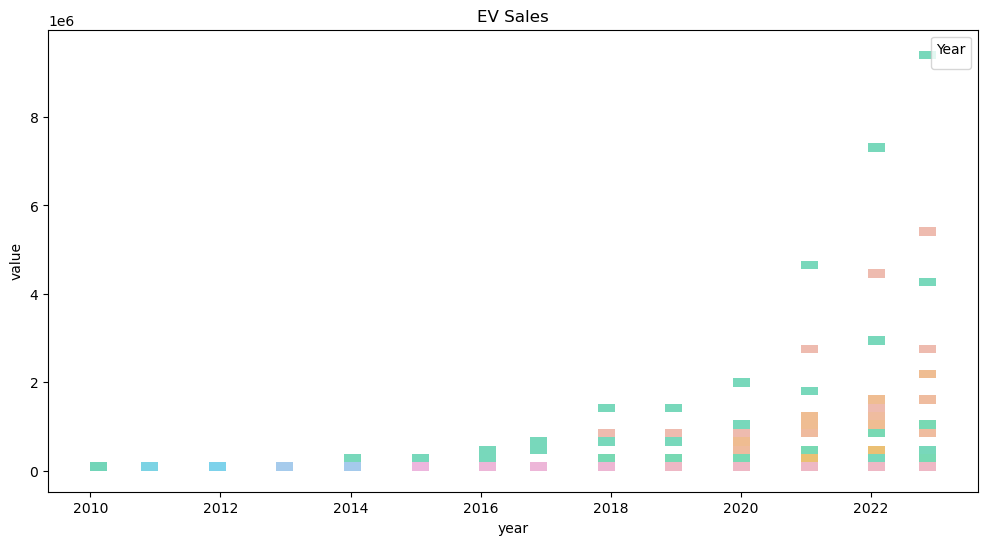

In [146]:
# Plot a normal histogram for sales and each year
plt.figure(figsize=(12, 6))
sns.histplot(ev_sales, x='year', y="value", bins=50, kde=True, hue="region")
plt.title('EV Sales')
plt.legend(title='Year')
plt.show()


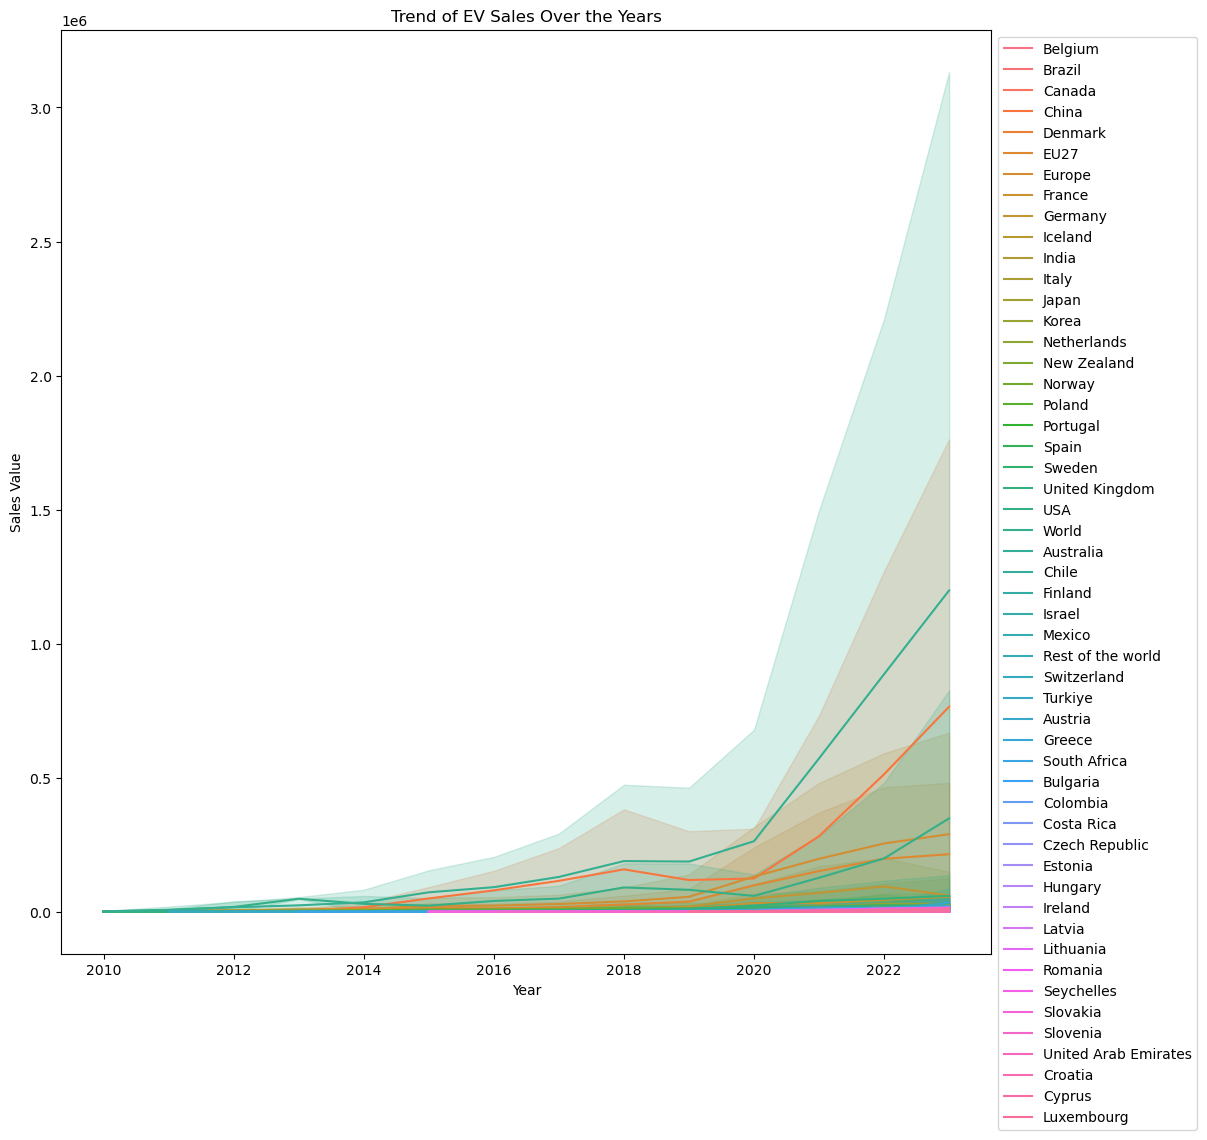

In [138]:
# Plot the trend of EV sales over the years
plt.figure(figsize=(12, 12))
ev_sales = ev_sales[ev_sales['unit'] == 'Vehicles']
sns.lineplot(data=ev_sales, x='year', y='value', hue='region')
plt.title('Trend of EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.legend(title='Region')
# Move the legend to the bottom and order them according to the count of sales
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

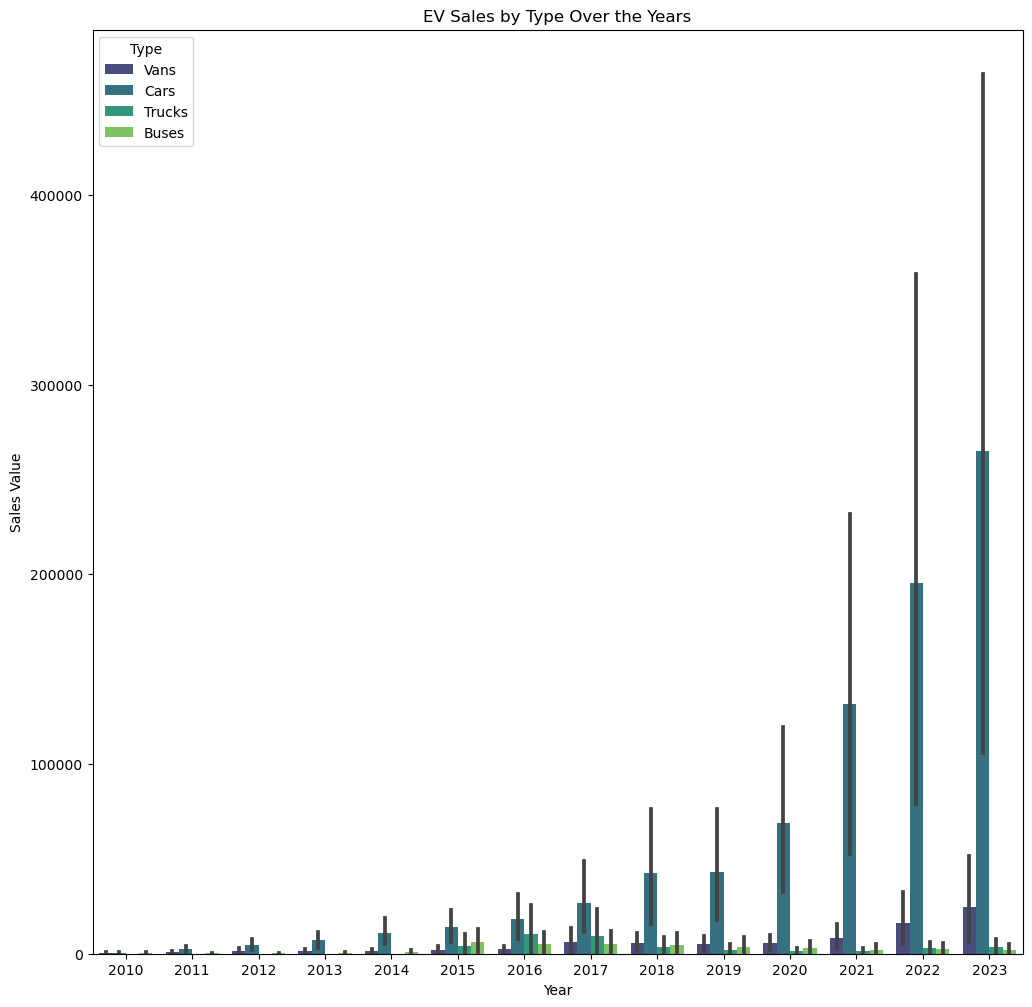

In [139]:
# Plot the bar chart for each type of EV... Car, Bus, Van, etc.. over the years
plt.figure(figsize=(12, 12))
ev_sales = ev_sales[ev_sales['unit'] == 'Vehicles']
sns.barplot(data=ev_sales, x='year', y='value', hue='mode', palette='viridis' )
plt.title('EV Sales by Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.legend(title='Type')
plt.show()


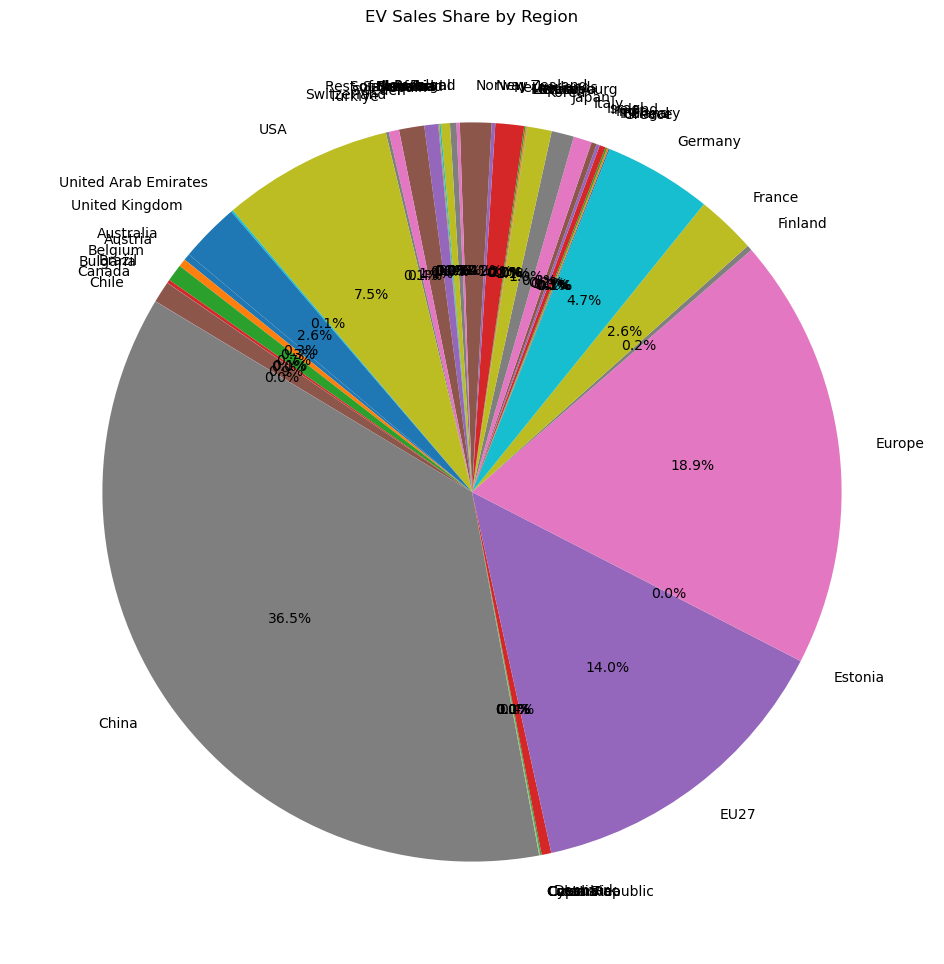

In [152]:
# Plot a pie chart representing each country's (region) share of EV sales
plt.figure(figsize=(12, 12))
ev_sales = ev_sales[ev_sales['unit'] == 'Vehicles']  
ev_sales = ev_sales[ev_sales['region'] != 'World'] 
sales_by_region = ev_sales.groupby('region')['value'].sum()
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('EV Sales Share by Region')
plt.show()

In [130]:
ev_charging_points.head(25)
dataframes_category = { param: data for param, data in df.groupby('category')}
for i in dataframes_category:
    print(i)
df.head(50)

Historical
Projection-APS
Projection-STEPS


,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350.0,"35000,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3.0,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7.0,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62.0,"6200,00%"
5,Belgium,Historical,EV sales,Cars,BEV,2010,Vehicles,48.0,"4800,00%"
6,Belgium,Historical,EV stock,Cars,BEV,2010,Vehicles,61.0,"6100,00%"
7,Belgium,Historical,EV sales,Cars,PHEV,2010,Vehicles,8.0,"800,00%"
9,Belgium,Historical,EV stock,Cars,FCEV,2010,Vehicles,1.0,"100,00%"
10,Belgium,Historical,EV stock,Cars,PHEV,2010,Vehicles,9.0,"900,00%"
11,Belgium,Historical,EV stock,Trucks,BEV,2010,Vehicles,2.0,"200,00%"


In [131]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ev_sales_with_projection = df[df['unit'] == 'Vehicles']
# One-Hot Encoding for 'mode' and 'powertrain'
df_encoded = pd.get_dummies(ev_sales_with_projection, columns=['mode', 'powertrain'])


X = df_encoded.drop(columns=['category', 'parameter', 'unit', 'region', 'value', 'percentage'], axis=1)
y = df_encoded['value']

X.head(100)
len(y)

6796

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=150, batch_size=32)

test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae}")

Epoch 1/150


c:\Users\Roshan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2024367194112.0000 - mae: 248449.2656 - val_loss: 3721284288512.0000 - val_mae: 359414.7812
Epoch 2/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 2286223097856.0000 - mae: 281106.4375 - val_loss: 3721204072448.0000 - val_mae: 359360.4062
Epoch 3/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 1673847111680.0000 - mae: 240808.8594 - val_loss: 3720916762624.0000 - val_mae: 359253.6250
Epoch 4/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 1895573880832.0000 - mae: 250716.7656 - val_loss: 3720328511488.0000 - val_mae: 359174.4062
Epoch 5/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 2337654702080.0000 - mae: 292740.7812 - val_loss: 3719366705152.0000 - val_mae: 359223.0938
Epoch 6/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 1822018895872.0000 - mae: 245970.1094 - val_loss: 3717999886336.0000 - val_mae: 359452.2188
Epoch 7/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 2232659476480.0000 - 

In [133]:
import numpy as np
from sklearn.metrics import r2_score

# Make predictions
X_test_np = np.array(X_test, dtype=np.float32)
y_pred = model.predict(X_test_np)

# Compute MAE and MSE
mae = np.mean(np.abs(y_test - y_pred.flatten()))
mse = np.mean((y_test - y_pred.flatten()) ** 2)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute R²
r2 = r2_score(y_test, y_pred)

# Compute Percentage Error
percentage_error = (mae / np.mean(y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")
print(f"Percentage Error: {percentage_error}%")


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error (MAE): 909025784.6408088
Mean Squared Error (MSE): 8.263333638553591e+17
Root Mean Squared Error (RMSE): 909028802.5444293
R-Squared (R²): -455274.0186549517
Percentage Error: 338608.16376247664%


In [135]:
model.save('car_sales.keras')